# Аналитика в авиакомпании:
«F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Необходимо изучить базу данных и сделать текущие выводы.
- /datasets/query_1.csv — результат первого запроса. В нём содержится информация о:
  model — модели самолета
  flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

- /datasets/query_3.csv — результат третьего запроса. В нём содержится информация о:
  city — городах
  average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

# Задачи исследования:
1. [Изучение общей информации](#start)
2. [Предобработка данных](#preprocessing)
3. [Исследовательский анализ данных](#e)
    - [Выбрать топ-10 городов по количеству рейсов](#e)
    - [Построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов](#b)
    - [Сделать выводы по каждому из графиков, пояснить результат](#c)
4. [Вывод](#g)    

# Шаг 1. Изучение общей информации:
<a id="start"></a>

Подключение библиотек и импорт данных с информацией о модели самолета и количестве рейсов для каждой модели самолетов в сентябре 2018 года

In [34]:
#Подключение библиотек
import pandas as pd
import matplotlib.pyplot as plt
#Импорт данных 
data = pd.read_csv('/datasets/query_1.csv')
display(data)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Импорт данных с информацией о городах и среднем количестве рейсов, прибывающих в город за день в августе 2018 года

In [35]:
data_2 = pd.read_csv('/datasets/query_3.csv')
display(data_2.head(10))
display(data_2.tail(10))

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


,city,average_flights
91,Хабаровск,6.548387
92,Ханты-Мансийск,8.419355
93,Чебоксары,5.000000
94,Челябинск,6.709677
95,Череповец,2.161290
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935
100,Ярославль,1.322581


На первый взгляд все данные чистые

In [36]:
display(data.describe())
display(data_2.describe())

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [37]:
data.info()
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Импортировав файлы и изучив данные можно сделать первые выводы. Данные выгледят читаемо, без пропусков и дубликатов. Типы данных корректны.

# Шаг 2. Предобработка данных:
<a id="preprocessing"></a>

In [38]:
#Проверка на пропуски
display(data.isna().sum())
display(data_2.isna().sum())

model             0
flights_amount    0
dtype: int64

city               0
average_flights    0
dtype: int64

In [39]:
#Проверка на дубликаты
display(data.duplicated().sum())
display(data_2.duplicated().sum())

0

0

Вывод: пропусков и дубликатов нет

# Шаг 3. Исследовательский анализ данных:
<a id="e"></a>

### Выбор топ-10 городов по количеству рейсов:
<a id="e"></a>

In [40]:
data_2_new = data_2.sort_values(by = 'average_flights', ascending = False).head(10)
display(data_2_new)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


### Построение графиков
- модели самолетов и количество рейсов
- города и количество рейсов
- топ-10 городов и количество рейсов
<a id="b"></a>

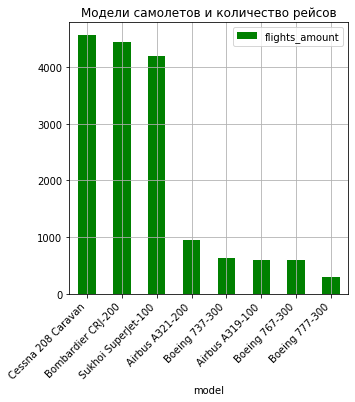

In [41]:
import matplotlib.pyplot as plt
data.sort_values(by = 'flights_amount', ascending = False).plot(x='model', y='flights_amount', kind='bar', grid=True, figsize=(5, 5), title='Модели самолетов и количество рейсов', color='g')
plt.xticks(rotation=45, ha='right')
plt.show()

Вывод: лидируют с большим отрывом 3 модели: Cessna 208 Caravan, Bombardier CRJ-200  и Sukhoi SuperJet-100. Эти модели значительно обгоняют Airbus и Boeing. И это не удивительно. Airbus и Boeing конкурируют между собой уже очень давно, на рынке они занимают почти одинаковые позиции. Данные самолеты большой длинны, могут перевозить много людей. В век развивающихся технологий это становится неактуально, самолеты летают очень часто и на такой большой самолет сложно набрать нужное количество людей. Поэтому данные компании вытесняют сегоднешние лидеры. Они меньше, имеют варианты с увеличенной дальностью полета. 

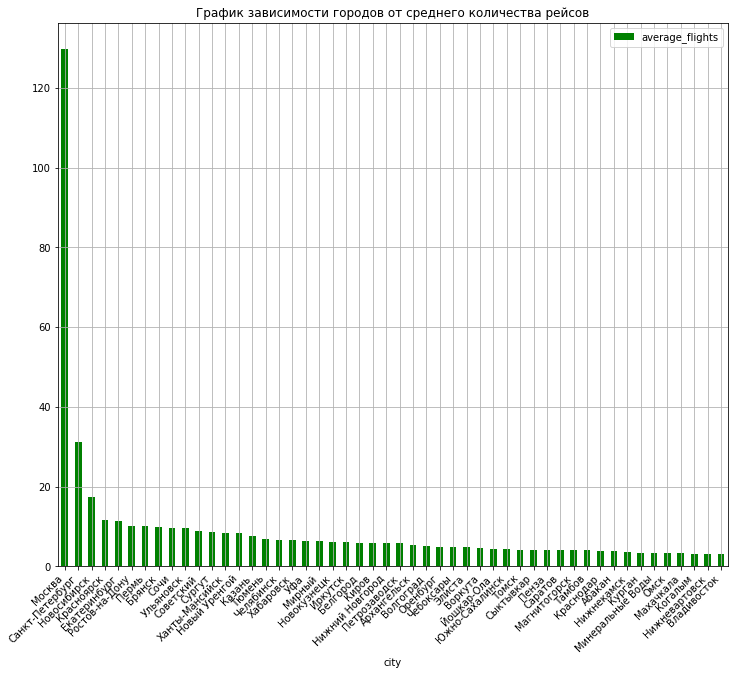

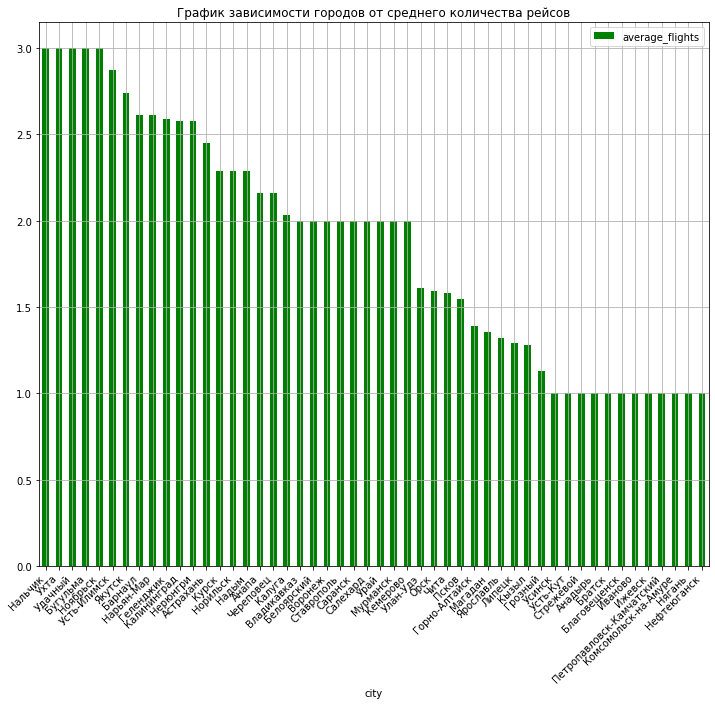

In [42]:
data_2.sort_values(by =  'average_flights', ascending = False).head(50).plot(x = 'city', y = 'average_flights', kind = 'bar', grid = True, figsize = (12, 10), color = 'g',  title = 'График зависимости городов от среднего количества рейсов')
plt.xticks(rotation=45, ha='right');
data_2.sort_values(by =  'average_flights', ascending = False).tail(50).plot(x = 'city', y = 'average_flights', kind = 'bar', grid = True, figsize = (12, 10), color = 'g',  title = 'График зависимости городов от среднего количества рейсов')
plt.xticks(rotation=45, ha='right');

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

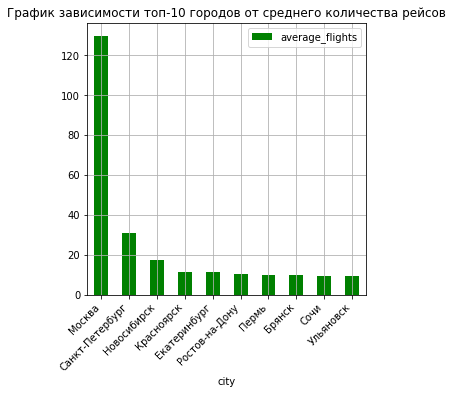

In [43]:
data_2_new.plot(x = 'city', y = 'average_flights', kind = 'bar', grid = True, figsize = (5,5), color = 'g', title = 'График зависимости топ-10 городов от среднего количества рейсов')
plt.xticks(rotation=45, ha='right')

Достаточно большая разница по городам и топ-10 городам по среднему кол-ву самолетов прибывающих за день. Преобладает столица - Москва, после идет Санкт-Петербург и Новосибирск. Остальные города в среднем сравнимо имеют одинаковое кол-во рейсов. Города лидеры - это города, в которые чаще всего ездят с командировками, возможно студенты на учебу или посмотреть красивые достопримечательности. Другие представленные города не так часто посещают, они не так популярны в достопримечательностях и нет таких возможностей работы. Удивительно, что город Сочи занимает предпоследнюю строчку, но скорее всего это обусловленно тем, что в агусте становится прохладнее и люди перестают ездить отдыхать.

# Вывод:
<a id="g"></a>
- были изучили данные по количеству перелетов за сентябрь 2018г. по каждой модели самолета, выяснено, что самыми используемыми моделями самолета (в сентябре 2018г.) являются Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100.
- В основном самолеты летают в город Москва, Санкт-Петербург, Новосибирск. Остальные города в среднем сравнимо имеют одинаковое кол-во рейсов.
